In [125]:
import pandas as pd
import numpy as np
import scipy
import utm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from itertools import combinations

%matplotlib inline

In [3]:
COLUMNS = ["NAME20", "INTPTLAT20", "INTPTLON20", "POP20"]

df = pd.read_csv("SF_Census.csv")
df = df[df.AWATER20 == 0]
df = df[COLUMNS]

Xs, Ys, _, _ = utm.from_latlon(df["INTPTLAT20"].values, df["INTPTLON20"].values)
df["x"] = Xs
df["y"] = Ys

print("Total population:", df.POP20.sum())
df

Total population: 872074


,NAME20,INTPTLAT20,INTPTLON20,POP20,x,y
0,Block 1001,37.808484,-122.409904,15,551943.527375,4.184730e+06
1,Block 1005,37.773038,-122.494435,173,544523.807391,4.180754e+06
2,Block 1005,37.783112,-122.448710,150,548544.162719,4.181894e+06
3,Block 2003,37.747121,-122.489407,168,544982.305640,4.177881e+06
4,Block 2002,37.782709,-122.456171,178,547887.452272,4.181846e+06
...,...,...,...,...,...,...
5981,Block 1001,37.805051,-122.414332,560,551556.116424,4.184347e+06
5982,Block 1003,37.804076,-122.416175,61,551394.542882,4.184238e+06
5983,Block 2005,37.731541,-122.396291,159,553196.899900,4.176201e+06
5984,Block 3005,37.730053,-122.401487,234,552740.148480,4.176033e+06


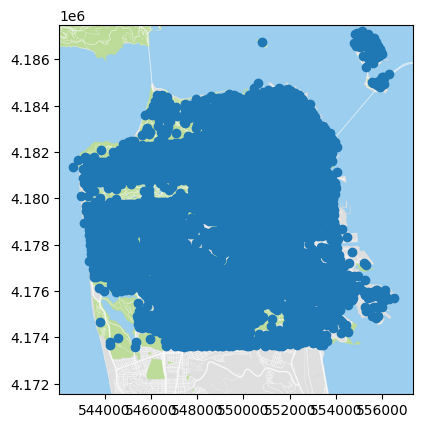

In [4]:
# Load data
map_img = mpimg.imread("sf-map.jpeg")
xmin, ymin, _, _ = utm.from_latlon(37.690088, -122.523)
xmax, ymax, _, _ = utm.from_latlon(37.833135, -122.3484)

plt.imshow(map_img, extent = [xmin, xmax, ymin, ymax])
plt.scatter(x = df.x, y = df.y)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()

In [6]:
# Choose 40 nodes to minimize total distance to nearest node over the population
N = 40
xys = df[["x", "y"]].values
distances = scipy.spatial.distance_matrix(xys, xys)

selected_nodes = []
for _ in range(N):
    best_score = float("inf")
    for i in range(len(df)):
        if i in selected_nodes:
            continue
        temp_selected = selected_nodes + [i]
        min_distances = np.min(distances[:, temp_selected], axis = 1)
        weighted_distances = min_distances * df.POP20
        score = np.sum(weighted_distances)
        
        if score < best_score:
            best_score = score
            next_selected = temp_selected

    selected_nodes = next_selected
    
selected_df = df.iloc[selected_nodes]
selected_df

,NAME20,INTPTLAT20,INTPTLON20,POP20,x,y
5128,Block 3005,37.763425,-122.432608,191,549975.339995,4.179719e+06
5211,Block 3000,37.725949,-122.436911,169,549621.320863,4.175558e+06
3166,Block 1000,37.787816,-122.415911,881,551429.045745,4.182434e+06
3140,Block 2005,37.762372,-122.482953,153,545541.590724,4.179576e+06
4834,Block 3004,37.731819,-122.401061,142,552776.442778,4.176229e+06
1473,Block 1006,37.783263,-122.450799,126,548360.132077,4.181910e+06
4116,Block 3004,37.720675,-122.465820,177,547077.080470,4.174958e+06
5549,Block 2001,37.756822,-122.409049,229,552055.020640,4.178999e+06
2488,Block 4004,37.743347,-122.490221,144,544912.918155,4.177462e+06
1488,Block 2007,37.781631,-122.395125,19,553263.745657,4.181759e+06


In [ ]:
N = 40
xys = df[["x", "y"]].values
distances = scipy.spatial.distance_matrix(xys, xys)

selected_nodes = []
for _ in range(N):
    best_score = float("inf")
    for i in range(len(df)):
        if i in selected_nodes:
            continue
        temp_selected = selected_nodes + [i]
        min_distances = np.min(distances[:, temp_selected], axis = 1)
        weighted_distances = min_distances * df.POP20
        score = np.sum(weighted_distances)
        
        if score < best_score:
            best_score = score
            next_selected = temp_selected

    selected_nodes = next_selected
    
selected_df = df.iloc[selected_nodes]

plt.imshow(map_img, extent = [xmin, xmax, ymin, ymax])
plt.scatter(x = selected_df.x, y = selected_df.y)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()

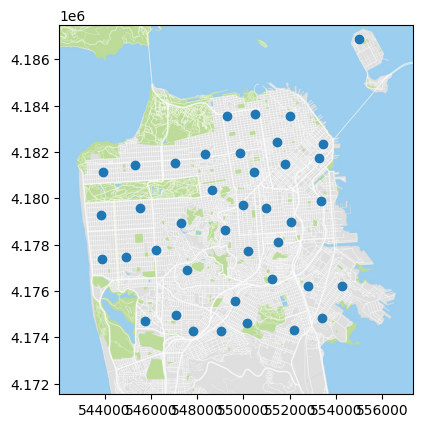

In [7]:
plt.imshow(map_img, extent = [xmin, xmax, ymin, ymax])
plt.scatter(x = selected_df.x, y = selected_df.y)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()

array([ 553012.88342729, 4174574.33916975])

In [85]:
selected_df_xys = selected_df[["x", "y"]]
selected_distances = scipy.spatial.distance_matrix(selected_df_xys, selected_df_xys)
selected_distances = np.where(selected_distances == 0, float("inf"), selected_distances)
min_index = np.argmin(selected_distances)
row_index, col_index = np.unravel_index(min_index, selected_distances.shape)
row_index, col_index
selected_distances[9, 39]
first_df = selected_df.iloc[row_index]
sec_df = selected_df.iloc[col_index]
x_first, y_first = [first_df["x"], sec_df["x"]], [first_df["y"], sec_df["y"]]


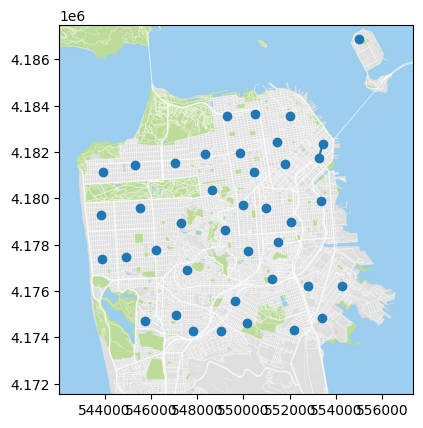

In [86]:
plt.imshow(map_img, extent = [xmin, xmax, ymin, ymax])
plt.scatter(x = selected_df.x, y = selected_df.y)
plt.plot(x_first, y_first)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()

In [117]:
def is_connected(E, start, target, visited):
    visited.add(start)

    if start == target:
        return True

    neighbors = set()
    for edge in E:
        if start in edge:
            a, b = edge
            neighbors.add(a)
            neighbors.add(b)
    
    for neighbor in neighbors:
        if neighbor not in visited:
            if is_connected(E, neighbor, target, visited):
                return True

    return False

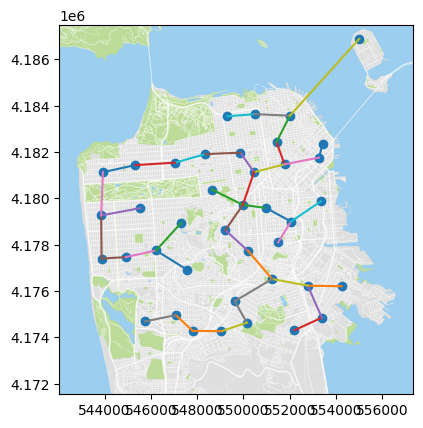

In [118]:
plt.plot(x_first, y_first)

plt.imshow(map_img, extent = [xmin, xmax, ymin, ymax])
plt.scatter(x = selected_df.x, y = selected_df.y)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

dists_copy = selected_distances.copy()
edges = [(row_index, col_index)]
dists_copy[row_index, col_index] = float("inf")
dists_copy[col_index, row_index] = float("inf")

# Set this cell in distances matrix to inf
while len(edges) < N - 1:
    min_index = np.argmin(dists_copy)
    r_index, c_index = np.unravel_index(min_index, dists_copy.shape)
    first_df = selected_df.iloc[r_index]
    sec_df = selected_df.iloc[c_index]
    x, y = [first_df["x"], sec_df["x"]], [first_df["y"], sec_df["y"]]
    dists_copy[r_index, c_index] = float("inf")
    dists_copy[c_index, r_index] = float("inf")
    if is_connected(edges, r_index, c_index, set()):
        continue
    plt.plot(x, y)
    edges.append((r_index, c_index))
    
plt.show()


In [162]:
import heapq
from collections import defaultdict


class Graph:
    def __init__(self, E, df):
        self.df = df
        self.neighbor_list = defaultdict(list)
        for a, b in E:
            dist = self.euclidean_dist(a, b)
            self.neighbor_list[a].append((b, dist))
            self.neighbor_list[b].append((a, dist))
            
    def euclidean_dist(self, a, b):
        x1 = self.df.iloc[a].x
        x2 = self.df.iloc[b].x
        y1 = self.df.iloc[a].y
        y2 = self.df.iloc[b].y
        return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    
    def dijkstra(self, start, end):
        pq = [(0, start)]
        path = {}
        distances = defaultdict(lambda: float('inf'))
        distances[start] = 0
        
        while pq:
            current_distance, current = heapq.heappop(pq)
            
            if current == end:
                return self.path_dist(path, current)
            
            if current_distance > distances[current]:
                continue
            
            for neighbor, weight in self.neighbor_list[current]:
                new_distance = distances[current] + weight
                
                if new_distance < distances[neighbor]:
                    path[neighbor] = current
                    distances[neighbor] = new_distance
                    heapq.heappush(pq, (new_distance, neighbor))
        
        raise RuntimeError("Node not reachable")
    
    def path_dist(self, path, current):
        dist = 0
        while current in path:
            dist += self.euclidean_dist(current, path[current])
            current = path[current]
        return dist

In [172]:
nodes = {i for i in range(len(selected_df))}
new_edges = edges.copy()
graph = Graph(new_edges, selected_df)
M = 9

pairs = list(combinations(nodes, 2))
for _ in range(M):
    worst_ratio = 0
    for start, end in pairs:
        graph_dist = graph.dijkstra(start, end)
        dist = graph.euclidean_dist(start, end)
        ratio = graph_dist / dist
        if ratio > worst_ratio:
            worst_ratio = ratio
            new_edge = (start, end)

    new_edges.append(new_edge)
    graph = Graph(new_edges, selected_df)
    
plt.imshow(map_img, extent = [xmin, xmax, ymin, ymax])
plt.scatter(x = selected_df.x, y = selected_df.y)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

for a, b in new_edges:
    row1 = selected_df.iloc[a]
    row2 = selected_df.iloc[b]
    plt.plot((row1.x, row2.x), (row1.y, row2.y))

plt.show()

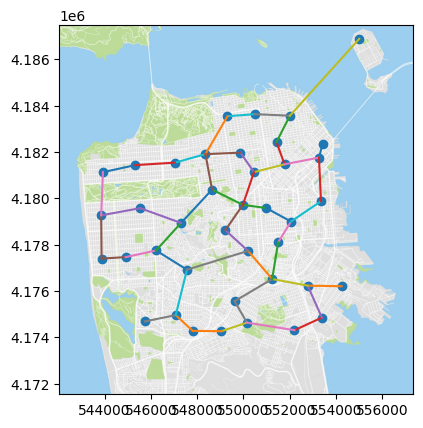

In [175]:
plt.imshow(map_img, extent = [xmin, xmax, ymin, ymax])
plt.scatter(x = selected_df.x, y = selected_df.y)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

for a, b in new_edges:
    row1 = selected_df.iloc[a]
    row2 = selected_df.iloc[b]
    plt.plot((row1.x, row2.x), (row1.y, row2.y))

plt.show()